In [19]:
import hmc_tomography
import numpy, tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
dimensions = 20

In [3]:
def unit_vector(dimension, dimensions=dimensions):
    v = numpy.zeros((dimensions, 1))
    v[dimension] = 1.0
    return v


def construct_H(mass_matrix):

    rows = []

    for dim in range(mass_matrix.dimensions):
        rows.append(mass_matrix.H(unit_vector(dim)).T)

    return numpy.vstack(rows)


def construct_SIGMA(mass_matrix):

    rows = []

    for dim in range(mass_matrix.dimensions):
        rows.append(mass_matrix.Hinv(unit_vector(dim)).T)

    return numpy.vstack(rows)


def construct_DIAGONAL(mass_matrix):

    entries = []

    for dim in range(mass_matrix.dimensions):
        entries.append(mass_matrix.Hinv(unit_vector(dim))[dim])

    return numpy.array(entries)

In [4]:
means = numpy.ones((dimensions, 1))
variances = numpy.arange(dimensions)[:, None] + 1

normal_dist = hmc_tomography.Distributions.Normal(means, variances)

/home/larsgebraad/Documents/Hamiltonian Monte Carlo/hmc-tomography/hmc_tomography/Distributions/base.py:378: Warning: Seems that you only passed a vector as the covariance matrix. It will be used as the covariance diagonal.
  Warning,


100%|██████████| 800/800 [00:09<00:00, 83.42it/s] 


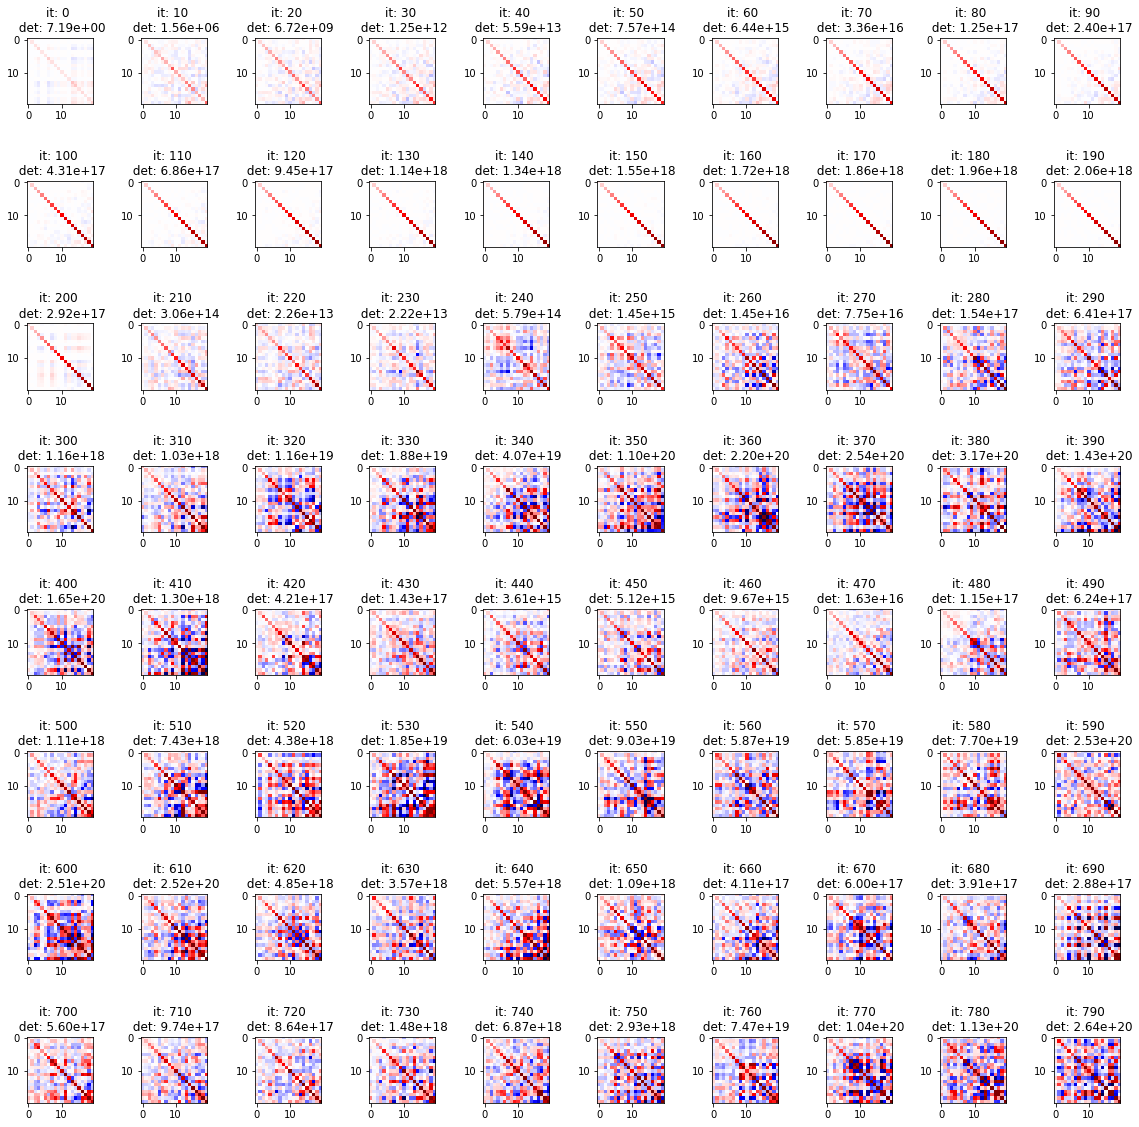

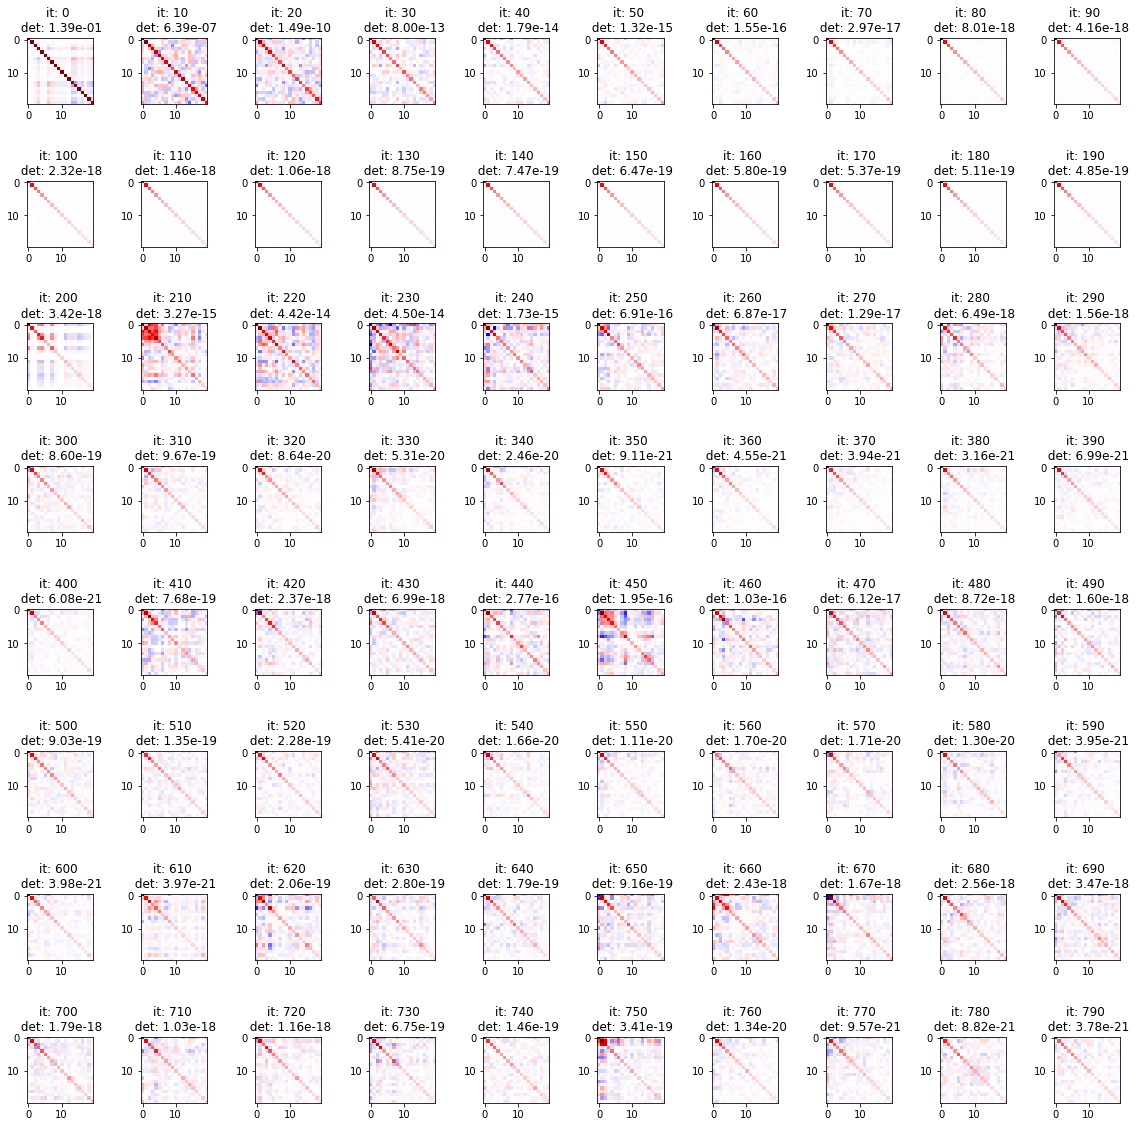

In [46]:
numpy.set_printoptions(precision=2)

mm = hmc_tomography.MassMatrices.LBFGS(
    dimensions, number_of_vectors=200, max_determinant_change=0.1
)

iterations = 800

fig, ax = plt.subplots(int(iterations / 100), 10, figsize=(16, 16))

plt.tight_layout()

fig2, ax2 = plt.subplots(int(iterations / 100), 10, figsize=(16, 16))

plt.tight_layout()

numpy.random.seed(42)

for i in tqdm.trange(iterations):

    location = 10.0 * numpy.random.randn(dimensions, 1)

    gradient = normal_dist.gradient(location)

    mm.update(location, gradient)

    if i % 10 == 0:

        ix = int(i / 100)
        iy = int((i % 100) / 10)

        C = construct_SIGMA(mm)

        ax[ix, iy].imshow(
            C, vmin=-dimensions, vmax=dimensions, cmap=plt.get_cmap("seismic")
        )
        ax[ix, iy].set_title(f"it: {i} \n det: {numpy.exp(-mm.logdet()):.2e}")

        H = construct_H(mm)

        im2 = ax2[ix, iy].imshow(H, vmin=-1, vmax=1, cmap=plt.get_cmap("seismic"))
        ax2[ix, iy].set_title(f"it: {i} \n det: {numpy.exp(mm.logdet()):.2e}")

#         ax2_divider = make_axes_locatable(ax2[ix, iy])
#         # add an axes above the main axes.
#         cax2 = ax2_divider.append_axes("right", size="10%", pad="10%")
#         cb2 = plt.colorbar(im2, cax=cax2, orientation="vertical")

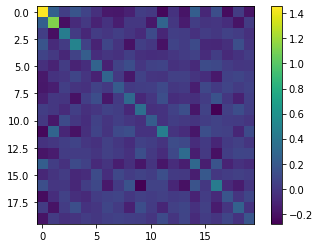

In [26]:
plt.imshow(construct_H(mm))
plt.colorbar()

In [43]:
numpy.linalg.det(construct_H(mm)) - numpy.exp(mm.logdet())
# fucking a

0.0

Text(0.5, 1.0, 'det: 4.11e-19')

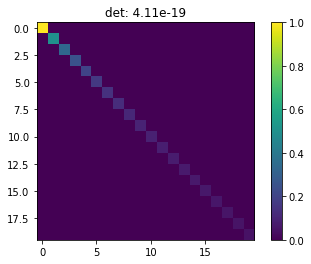

In [39]:
analytical_H = numpy.linalg.inv(numpy.diag(variances[:, 0]))

plt.imshow(analytical_H)
plt.colorbar()
plt.title(f"det: {numpy.linalg.det(analytical_H):.2e}")

In [ ]:
analytical_H = numpy.linalg.inv(numpy.diag(variances[:, 0]))

plt.imshow(analytical_H)
plt.colorbar()
plt.title(f"det: {numpy.linalg.det(analytical_H):.2e}")

In [35]:
import math

f"{math.factorial(20):.2e}"

'2.43e+18'

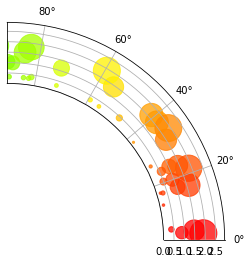

In [61]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta


fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

ax.set_rorigin(-7.5)
ax.set_theta_zero_location('W', offset=180)

ax.set_thetamin(0)
ax.set_thetamax(90)